# ACoC in West Antarctica plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.path as mpath
import xarray as xr
import cf_xarray
import cmocean as cm

In [2]:
# Import the data (names generalised to use for both comparisons)

data_1a = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_map_prescribed_Pan01.nc', chunks = 'auto')
data_1b = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/botsalt_anom_map_prescribed_pan01.nc', chunks = 'auto')
data_2a = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_map_prescribed_ACCESS.nc', chunks = 'auto')
data_2b = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/botsalt_anom_map_prescribed_access.nc', chunks = 'auto')

data_1C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_C_map_prescribed_Pan01.nc')
data_2C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_C_map_prescribed_ACCESS.nc')

In [3]:
# Shelf mask

def shelf_mask_isobath(var, model_dict):

    paths = {
             "mom5": "/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz",
             "mom6_01": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc",
            "mom6_005": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_005deg.nc"
             }

    var = var.cf.sel({'latitude': slice(-90, -59)})

    if paths[model_dict][-3:] == '.nc':
        shelf_mask = xr.open_dataset(paths[model_dict])['contour_masked_above']
    else:
        contour_file = np.load(paths[model_dict])
        shelf_mask = xr.DataArray(contour_file['contour_masked_above'],
                                  coords = var.coords, 
                                  dims = var.dims,
                                  name = 'contour_masked_above')
    
    shelf_mask = xr.where(shelf_mask == 0, 1, 0)
    masked_var = var * shelf_mask
    
    return masked_var, shelf_mask

In [4]:
# Land and contour data
depth_1 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_static.nc')['deptho']
land_mask_1 = (0 * depth_1).fillna(1)
land_1 = xr.where(np.isnan(depth_1.rename('land_1')), 1, np.nan)
depth_1_shelf, shelf_contour_1 = shelf_mask_isobath(depth_1, 'mom6_01')

depth_2 = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_21mbath/output012/ocean/ocean_grid.nc')['ht']
land_mask_2 = (0 * depth_2).fillna(1)
land_2 = xr.where(np.isnan(depth_2.rename('land_2')), 1, np.nan)
depth_2_shelf, shelf_contour_2 = shelf_mask_isobath(depth_2, 'mom5')

In [5]:
# --- Define region of interest (West Antarctic shelf) ---
lon_min, lon_max = -100, -40
lat_min, lat_max = -75, -59

# --- Group datasets ---
datasets = [
    [   # Row 1: surface velocity
        {
            "data": data_1a,
            "land": land_1,
            "shelf_contour": shelf_contour_1,
            "land_mask": land_mask_1,
            "title": ""
        },
        {
            "data": data_2a,
            "land": land_2,
            "shelf_contour": shelf_contour_2,
            "land_mask": land_mask_2,
            "title": ""
        }
    ],
    [   # Row 2: bottom temperature
        {
            "data": data_1b,
            "land": land_1,
            "shelf_contour": shelf_contour_1,
            "land_mask": land_mask_1,
            "title": ""
        },
        {
            "data": data_2b,
            "land": land_2,
            "shelf_contour": shelf_contour_2,
            "land_mask": land_mask_2,
            "title": ""
        }
    ]
]

# --- Colourmap limits ---
vmin_vel, vmax_vel = -0.02, 0.02
vmin_temp, vmax_temp = -0.06, 0.06
cmap_vel = plt.get_cmap('RdBu').reversed()
cmap_temp = plt.get_cmap('RdBu').reversed()

In [15]:
# --- Define region of interest (West Antarctic shelf) ---
lon_min, lon_max = -100, -40
lat_min, lat_max = -75, -59

# --- Group datasets ---
datasets = [
    [   # Row 1 (new): data_1C / data_2C
        {
            "data": data_1C,
            "land": land_1,
            "shelf_contour": shelf_contour_1,
            "land_mask": land_mask_1,
            "title": "a) 0.1° Surface salinity anomaly"
        },
        {
            "data": data_2C,
            "land": land_2,
            "shelf_contour": shelf_contour_2,
            "land_mask": land_mask_2,
            "title": "b) 0.05° Surface salinity anomaly"
        }
    ],
    [   # Row 2: surface velocity
        {
            "data": data_1a,
            "land": land_1,
            "shelf_contour": shelf_contour_1,
            "land_mask": land_mask_1,
            "title": "c) 0.1° Surface velocity"
        },
        {
            "data": data_2a,
            "land": land_2,
            "shelf_contour": shelf_contour_2,
            "land_mask": land_mask_2,
            "title": "d) 0.05° Surface velocity"
        }
    ],
    [   # Row 3: bottom temperature
        {
            "data": data_1b,
            "land": land_1,
            "shelf_contour": shelf_contour_1,
            "land_mask": land_mask_1,
            "title": "e) 0.1° Bottom temperature"
        },
        {
            "data": data_2b,
            "land": land_2,
            "shelf_contour": shelf_contour_2,
            "land_mask": land_mask_2,
            "title": "f) 0.05° Bottom temperature"
        }
    ]
]

# --- Colourmap limits ---
vmin_cont, vmax_cont = 0, 0.1
vmin_vel, vmax_vel = -0.02, 0.02
vmin_temp, vmax_temp = -0.06, 0.06
cmap_common = plt.get_cmap('RdBu').reversed()

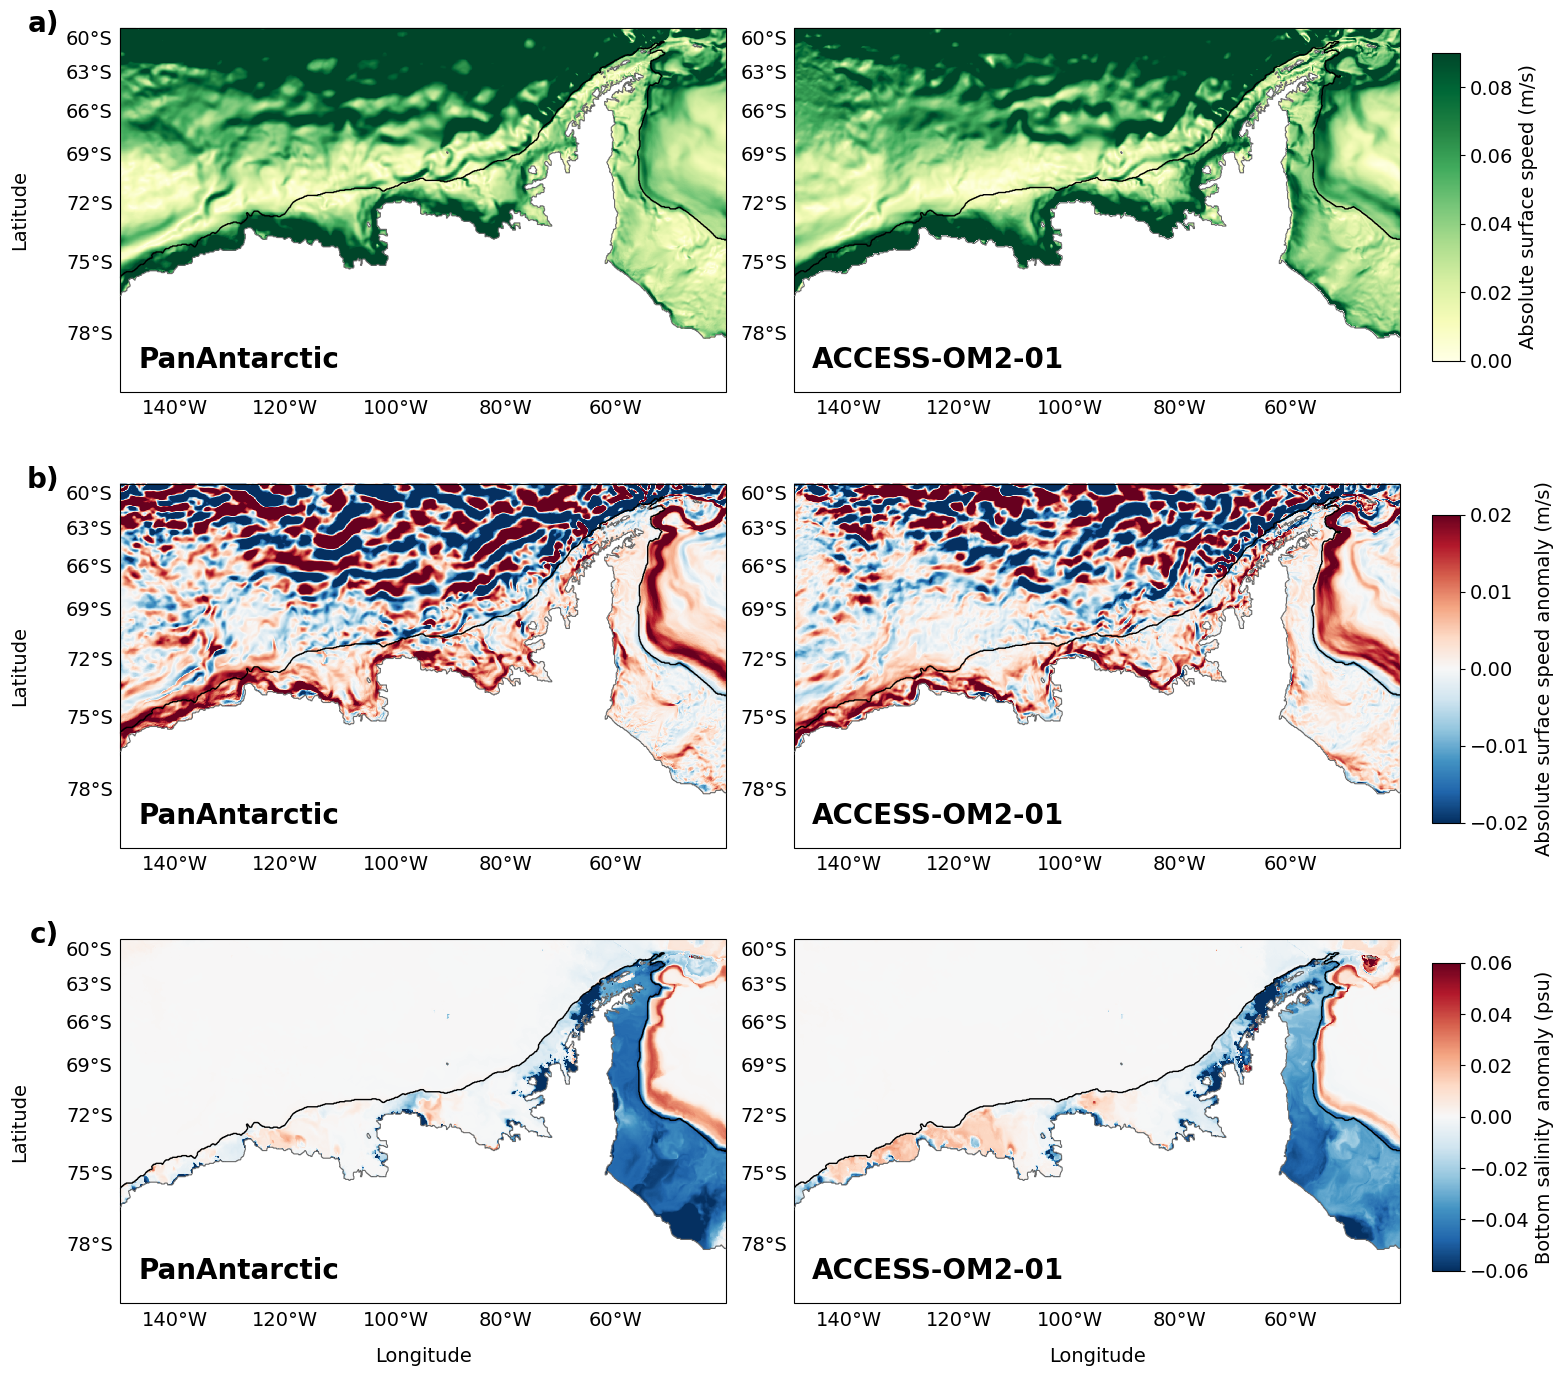

In [16]:
lon_min, lon_max = -150, -40
vmin_cont, vmax_cont = 0, 0.09

# --- Figure and layout setup ---
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(3, 2)  # <-- 3 rows now

axes = [[fig.add_subplot(gs[i, j], projection=ccrs.Mercator()) for j in range(2)] for i in range(3)]

mappables_salt, mappables_vel, mappables_temp = [], [], []

# --- Plot setup ---
for i, row in enumerate(datasets):
    for j, dset in enumerate(row):
        ax = axes[i][j]
        ax.set_extent([lon_min, lon_max, lat_min, lat_max])

        # Choose color limits per row
        if i == 0:
            vmin, vmax = vmin_cont, vmax_cont
            cmap = plt.get_cmap('YlGn')
        elif i == 1:
            vmin, vmax = vmin_vel, vmax_vel
            cmap = cmap_common
        else:
            vmin, vmax = vmin_temp, vmax_temp
            cmap = cmap_common

        mappable = dset["data"].plot(
            ax=ax, transform=ccrs.PlateCarree(),
            cmap=cmap, vmin=vmin, vmax=vmax, add_colorbar=False
        )
        if i == 0:
            mappables_salt.append(mappable)
        elif i == 1:
            mappables_vel.append(mappable)
        else:
            mappables_temp.append(mappable)

        # --- Filled land ---
        dset["land"].plot.contourf(
            ax=ax, colors='white', transform=ccrs.PlateCarree(), add_colorbar=False
        )

        # --- 1000 m isobath ---
        ax.contour(dset["shelf_contour"].cf['X'], dset["shelf_contour"].cf['Y'], dset["shelf_contour"],
           levels = [0, 1], colors = 'k', linewidths=1,transform = ccrs.PlateCarree())

        # --- Coastline ---
        ax.contour(
            dset["land_mask"].cf['X'], dset["land_mask"].cf['Y'], dset["land_mask"],
            levels=[0, 1], colors='dimgrey', linewidths=0.8, zorder=4,
            transform=ccrs.PlateCarree()
        )

        # --- Gridlines ---
        gl = ax.gridlines(draw_labels=True, alpha=0)
        gl.top_labels = gl.right_labels = False

# --- Axis labels and resolution text ---
for r, row in enumerate(axes):
    for c, ax in enumerate(row):
        if r == len(axes) - 1:  # bottom row only
            ax.text(0.5, -0.12, 'Longitude', va='top', ha='center',
                    transform=ax.transAxes)
        if c == 0:  # left column only
            ax.text(-0.15, 0.5, 'Latitude', va='center', ha='right',
                    rotation='vertical', transform=ax.transAxes)

        # Resolution label
        label = "PanAntarctic" if c == 0 else "ACCESS-OM2-01"
        ax.text(0.03, 0.05, label, transform=ax.transAxes,
                fontsize=20, fontweight='bold', color='black',
                ha='left', va='bottom',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=2))

# --- Panel labels ---
panel_labels = ["a)", "b)", "c)"]  # left column
for i, label in enumerate(panel_labels):
    axes[i][0].text(-0.1, 1.05, label, transform=axes[i][0].transAxes,
                    fontsize=20, fontweight='bold', va='top', ha='right')

# --- Shared colorbars ---
cbar_x = 1.02
cbar_width = 0.02

# Top (salinity)
cbar_ax1 = fig.add_axes([cbar_x, 0.73, cbar_width, 0.22])
cbar1 = fig.colorbar(mappables_salt[0], cax=cbar_ax1)
cbar1.set_label("Absolute surface speed (m/s)")

# Middle (velocity)
cbar_ax2 = fig.add_axes([cbar_x, 0.40, cbar_width, 0.22])
cbar2 = fig.colorbar(mappables_vel[0], cax=cbar_ax2)
cbar2.set_label("Absolute surface speed anomaly (m/s)")

# Bottom (temperature)
cbar_ax3 = fig.add_axes([cbar_x, 0.08, cbar_width, 0.22])
cbar3 = fig.colorbar(mappables_temp[0], cax=cbar_ax3)
cbar3.set_label("Bottom salinity anomaly (psu)")

plt.show()

# --- Save figure ---
fig.savefig("/g/data/g40/kc5856/thesis_figures/intermodel_WA_acoc_salt_maps_long.png",
            dpi=300, bbox_inches='tight')


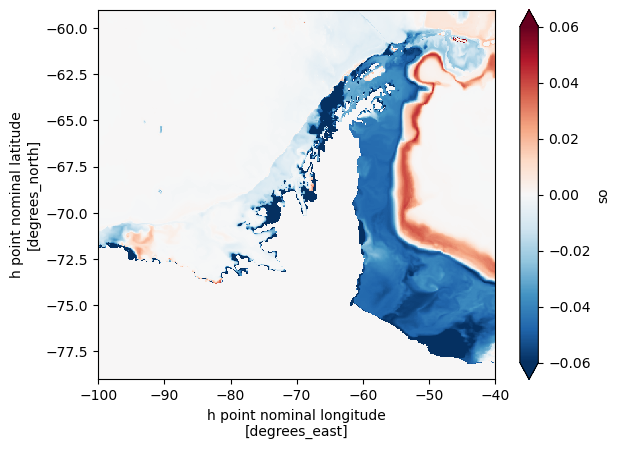

In [12]:
data_1b.sel(yh=slice(-79,-59),xh=slice(-100,-40)).plot(vmin=-0.06,vmax=0.06,cmap = plt.get_cmap('RdBu').reversed())

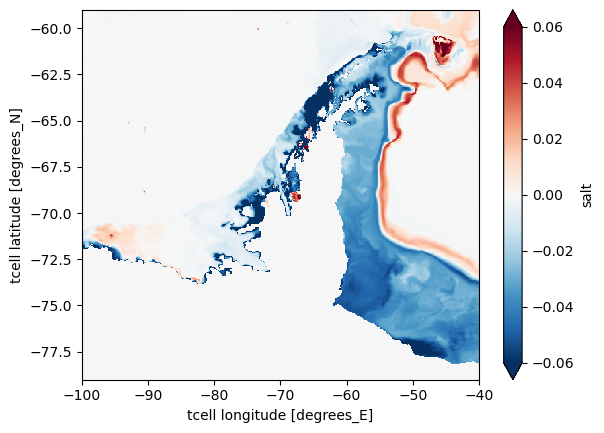

In [14]:
data_2b.sel(yt_ocean=slice(-79,-59),xt_ocean=slice(-100,-40)).plot(vmin=-0.06,vmax=0.06,cmap = plt.get_cmap('RdBu').reversed())

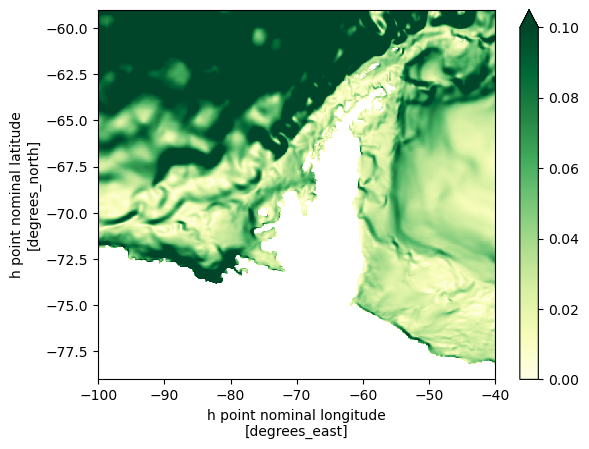

In [6]:
data_1C.sel(yh=slice(-79,-59),xh=slice(-100,-40)).plot(vmin=0,vmax=0.1,cmap = plt.get_cmap('YlGn'))

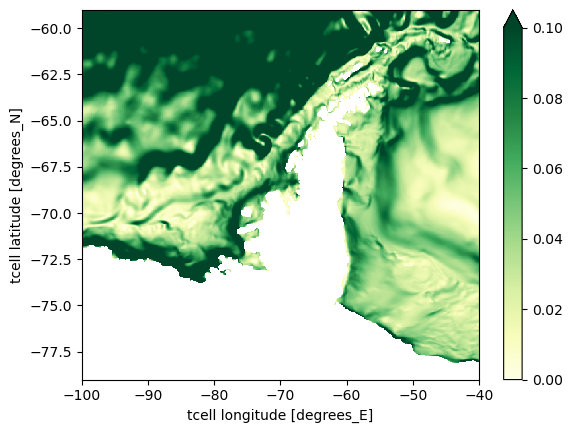

In [7]:
data_2C.sel(yt_ocean=slice(-79,-59),xt_ocean=slice(-100,-40)).plot(vmin=0,vmax=0.1,cmap = plt.get_cmap('YlGn'))

# Quantifying

In [17]:
acc_C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_C_map_prescribed_ACCESS.nc')
acc_M = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_C_map_prescribed_ACCESS.nc')

pan_C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_C_map_prescribed_ACCESS.nc')
pan_M = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_C_map_prescribed_ACCESS.nc')

In [ ]:
data_1C_acoc = pan_C.where(shelf_contour_1 == 1).sel(xh = slice(-150, -65)).load()
data_2C_acoc = acc_C.where(shelf_contour_2 == 1).sel(xt_ocean = slice(-150, -65)).load()

data_1M_acoc = pan_M.where(shelf_contour_1 == 1).sel(xh = slice(-150, -65)).load()
data_2M_acoc = acc_M.where(shelf_contour_2 == 1).sel(xt_ocean = slice(-150, -65)).load()

In [ ]:
data_1C_acoc.plot()

In [ ]:
# Importing areas
# Areas for averaging
area_old_01 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_static.nc')['areacello']
area_old_ac = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_21mbath/output012/ocean/ocean_grid.nc')['area_t']
var_01 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_month_z.nc')['so']
var_ac = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_21mbath/output012/ocean/ocean.nc')['salt']
area_corr_01 = area_old_01*(var_01.isel(time=0,z_l=0)*0 +1)
area_corr_ac = area_old_ac*(var_ac.isel(time=0,st_ocean=0)*0 +1)

In [ ]:
# Spatial average
data_1_C_ave = (area_corr_01 * data_1C_acoc).sum(['xh', 'yh']) / area_corr_01.where(shelf_contour_1 == 1).sel(xh = slice(-150, -65)).sum(['xh', 'yh'])
data_1_M_ave = (area_corr_01 * data_1M_acoc).sum(['xh', 'yh']) / area_corr_01.where(shelf_contour_1 == 1).sel(xh = slice(-150, -65)).sum(['xh', 'yh'])

data_2_C_ave = (area_corr_005 * data_2C_acoc).sum(['xt_ocean','yt_ocean']) / area_corr_ac.where(shelf_contour_2 == 1).sel(xh = slice(-150, -65)).sum(['xt_ocean','yt_ocean'])
data_2_M_ave = (area_corr_005 * data_2M_acoc).sum(['xt_ocean','yt_ocean']) / area_corr_ac.where(shelf_contour_2 == 1).sel(xh = slice(-150, -65)).sum(['xt_ocean','yt_ocean'])

In [ ]:
data_1_M_ave/ data_1_C_ave

In [ ]:
data_2_M_ave/ data_2_C_ave